# Obsługa ROS Topics

## Wprowadzenie - polecenia w terminalu
ROS Topics używane są do komunikacji rozgłoszeniowej. Nie ma znaczenia kto jest nadawcą, a kto odbiorcą wiadomości. Za kodowanie przesyłanej wiadomości odpowiada **Publisher**, a za rozkodowanie **Subscriber**. Typy wiadomości przechowywane są w katalogu srv, a rozszerzenie wiadomości to .msg.

### Struktura wiadomości

Z lewej strony należy podać typ wiadomości ROS. Mogą być one bardziej złożone i składać się z już utworzonych wiadomości (ROS msg). Z prawej strony podawana jest nazwa pola.

Typ wiadomości to nazwa paczki + nazwa_wiadomosci.msg. Wyświetlenie przykładowej wiadomości znajdującej się w paczce tsr_materials:

In [2]:
!rosmsg info pkg_tsr/RobotInfo

int32 robot_id
string info



### Wyświetlenie listy aktualnie dostępnych topiców

In [3]:
!rostopic list

/client_count
/clock
/connected_clients
/diagnostics
/gazebo/link_states
/gazebo/model_states
/gazebo/parameter_descriptions
/gazebo/parameter_updates
/gazebo/set_link_state
/gazebo/set_model_state
/odometry/odom
/rosout
/rosout_agg
/tb3_0/amcl/parameter_descriptions
/tb3_0/amcl/parameter_updates
/tb3_0/amcl_pose
/tb3_0/camera/depth/camera_info
/tb3_0/camera/depth/image_raw
/tb3_0/camera/depth/points
/tb3_0/camera/parameter_descriptions
/tb3_0/camera/parameter_updates
/tb3_0/camera/rgb/camera_info
/tb3_0/camera/rgb/image_raw
/tb3_0/camera/rgb/image_raw/compressed
/tb3_0/camera/rgb/image_raw/compressed/parameter_descriptions
/tb3_0/camera/rgb/image_raw/compressed/parameter_updates
/tb3_0/camera/rgb/image_raw/compressedDepth
/tb3_0/camera/rgb/image_raw/compressedDepth/parameter_descriptions
/tb3_0/camera/rgb/image_raw/compressedDepth/parameter_updates
/tb3_0/camera/rgb/image_raw/theora
/tb3_0/camera/rgb/image_raw/theora/parameter_descriptions
/tb3_0/camera/rgb/image_raw/theora/parameter_

### Wyświetlenie dostępnej pomocy dla polecenia rostopic

In [4]:
!rostopic --help

rostopic is a command-line tool for printing information about ROS Topics.

Commands:
	rostopic bw	display bandwidth used by topic
	rostopic delay	display delay of topic from timestamp in header
	rostopic echo	print messages to screen
	rostopic find	find topics by type
	rostopic hz	display publishing rate of topic    
	rostopic info	print information about active topic
	rostopic list	list active topics
	rostopic pub	publish data to topic
	rostopic type	print topic or field type

Type rostopic <command> -h for more detailed usage, e.g. 'rostopic echo -h'



### Najważniejsze topic'i w symulacji na przykładzie robota w przestrzeni nazw tb3_0

- /tb3_0/amcl_pose - położenie robota
- /tb3_0/cmd_vel - prędkości sterujące robotem
- /tb3_0/move_base_simple/goal - na ten topic wysyłana jest informacja o celu do którego ma dojechać robot
- /tb3_0/move_base/result - zwraca informację o tym czy udało się osiągnąć zadany cel

Wyświetlenie informacji o topic'u **/tb3_0/cmd_vel**:

In [9]:
!rostopic info /tb3_0/cmd_vel

Type: geometry_msgs/Twist

Publishers: 
 * /tb3_0/move_base (http://localhost:37187/)

Subscribers: 
 * /gazebo (http://localhost:46095/)




Wyświetlić informację o typie "geometry_msgs/Twist" powyższej wiadomości

In [10]:
!rosmsg info geometry_msgs/Twist

geometry_msgs/Vector3 linear
  float64 x
  float64 y
  float64 z
geometry_msgs/Vector3 angular
  float64 x
  float64 y
  float64 z



### Sprawdzenie danych w wiadomości

In [11]:
# po wywołaniu szybk zatrzymać stopem
# podgląd całej wiadomości
!rostopic echo -c /tb3_0/amcl_pose

Is /clock being published?
^C


In [8]:
# podgląd pojedynczego pola
!rostopic echo -c /tb3_0/amcl_pose/pose/pose/position

x: -6.8231662196844205
y: -0.9927414132392813
z: 0.0
---
^C


## Publisher - Python

Podstawową biblioteką do obsługi ROS w Pythonie jest **rospy**. Importowanie wiadomości na podstawie informacji o typie wiadomości jest następujące:

**import** ***nazwa_paczki.msg*** **import** ***typ_wiadomosci***

In [1]:
import rospy
from geometry_msgs.msg import Twist

Inicjalizacja node'a, aby ROS mógł jednoznacznie rozpoznać node'a.

Uwaga techniczna. 1 init_node wywoływany w danym zeszycie od Jupyter Notebook.

In [2]:
rospy.init_node("topics_test", anonymous=True)

Do utworzenia publishera wykorzystywana jest klasa *Publisher* z biblioteki *rospy*. Przyjmowane kolejno argumenty:
- nazwa topic'a, 
- typ wiadomości, 
- liczba zakolejkowanych wiadomości.

In [35]:
pub_speed=rospy.Publisher("/tb3_1/cmd_vel",Twist,queue_size=10)

Utworzenie i uzupełnienie wiadomości.

In [36]:
msg = Twist()
msg.linear.x = 0.1
msg.angular.z = 1

Do wysłania wiadomości do robota *turtle1* jest metoda klasy *Publisher* o nazwie *publish*, która jako argument
przyjmuje typ oczekiwanej wiadomości.

In [37]:
pub_speed.publish(msg)

Subscriber - polozenie robota x:  0.1
Subscriber - polozenie robota x:  0.1
Subscriber - polozenie robota x:  0.1


Publikowanie przykładowego wektora

In [9]:
!rosmsg info geometry_msgs/Vector3

[geometry_msgs/Vector3]:
float64 x
float64 y
float64 z



In [11]:
from geometry_msgs.msg import Vector3

In [12]:
pub_vector=rospy.Publisher("/example_vector",Vector3,queue_size=10)

In [15]:
msg = Vector3()
msg.x = 0.1
msg.y = 14 
msg.z = 45425
pub_vector.publish(msg)

## Subscriber - Python
Odbiór wysyłanej wiadomości.

In [30]:
def callback_function(msg_data):
    print("Subscriber - polozenie robota x: ", msg_data.linear.x)

Do utworzenia subscribera wykorzystywana jest klasa Publisher z biblioteki rospy. Przyjmowane kolejno argumenty:
- nazwa topic'u
- typ wiadomości
- nazwa funkcji, która jest wywoływana do odebrania danych z odczytanej wiadomości

In [34]:
from geometry_msgs.msg import Twist
my_subscriber = rospy.Subscriber("/tb3_1/cmd_vel",Twist,callback_function)

Wyłączenie subscriber'a.

In [32]:
my_subscriber.unregister()

## Odbiór informacji o skonfigurowanym punkcie
Po uruchomieniu RVIZ'a pierwsza strzałka zaznaczona na poniższym screenie odpowiada za wygenerowanie celu do którego ma dojechać robot. Poniższy subscrber odpowiada za wyświetlenie wartości o współrzędnych wskazanego przez użytkownika punktu na mapie. Kolejne kontrolki 2D Pose Estimate i 2D Nav Goal odnoszą się kolejno do robotów o nazwach tb3_0, tb3_1, tb3_2.
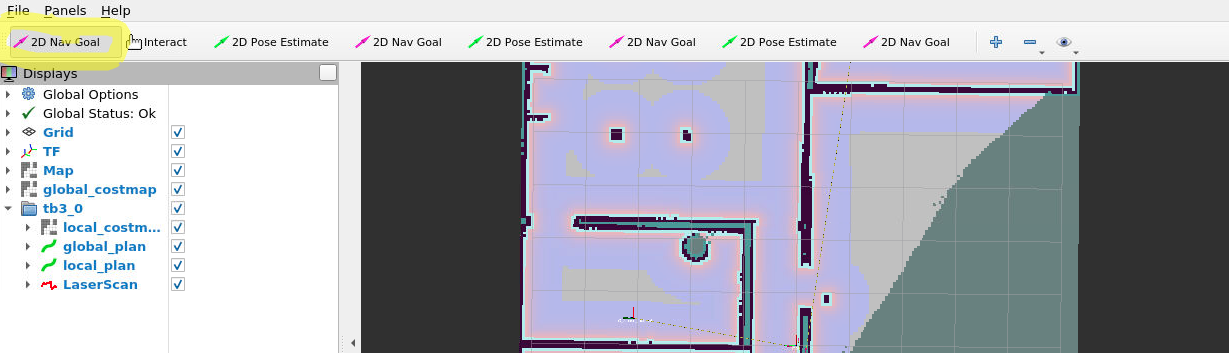

In [3]:
i = 0
def get_config_goal(data):
    global i
    print("-------------------- Wskazany cel id = {:d}  ------------------".format(i))
    print(data)
    i += 1

In [4]:
from geometry_msgs.msg import PoseStamped
my_goal = rospy.Subscriber("/config/goal",PoseStamped,get_config_goal)

------------- Wskazany cel id = 0  ----------
header: 
  seq: 19
  stamp: 
    secs: 586
    nsecs: 187000000
  frame_id: "map"
pose: 
  position: 
    x: 1.35630202293396
    y: 3.9084906578063965
    z: 0.0
  orientation: 
    x: 0.0
    y: 0.0
    z: -0.7705151428496234
    w: 0.6374216929470038
------------- Wskazany cel id = 1  ----------
header: 
  seq: 20
  stamp: 
    secs: 587
    nsecs:  65000000
  frame_id: "map"
pose: 
  position: 
    x: 3.881324052810669
    y: 0.6034948825836182
    z: 0.0
  orientation: 
    x: 0.0
    y: 0.0
    z: 0.004529665566746562
    w: 0.9999897410123033


In [3]:
!rostopic info /config/goal

Type: geometry_msgs/PoseStamped

Publishers: 
 * /rviz (http://localhost:44599/)

Subscribers: 
 * /rostopic_1759_1616492352278 (http://localhost:35197/)




In [4]:
!rosmsg info geometry_msgs/PoseStamped

std_msgs/Header header
  uint32 seq
  time stamp
  string frame_id
geometry_msgs/Pose pose
  geometry_msgs/Point position
    float64 x
    float64 y
    float64 z
  geometry_msgs/Quaternion orientation
    float64 x
    float64 y
    float64 z
    float64 w



In [6]:
!rosmsg info geometry_msgs/Pose

geometry_msgs/Point position
  float64 x
  float64 y
  float64 z
geometry_msgs/Quaternion orientation
  float64 x
  float64 y
  float64 z
  float64 w

------------- Wskazany cel id = 2  ----------
header: 
  seq: 21
  stamp: 
    secs: 4466
    nsecs: 515000000
  frame_id: "map"
pose: 
  position: 
    x: -2.9158084392547607
    y: 6.117886543273926
    z: 0.0
  orientation: 
    x: 0.0
    y: 0.0
    z: 0.0
    w: 1.0


## Zadania
### Zadanie na 3
Utworzenie Publishera dla jednego z robotów, na którym wysłany będzie cel. Wiadomość należy wysłać dla robota tb3_0, tb3_1 lub tb3_2 na topicu /nazwa_robota/move_base_simple/goal

1. Sprawdzić typ wiadomości
2. zaimportować typ wiadomości
3. Zebrać współrzędne punktu
4. Utworzyć publsihera
5. Utworzyć i wysłać wiadomość

### Zadanie na 4
Utworzyć subscribera wyświetlającego wartość rezultatu z topicu dla wybranego robota (/nazwa_robota/move_base/result). 

1. Sprawdzić typ wiadomości
2. Zimportować typ wiadomości
3. utworzyć funkcje wyswietlajaca status bedacy wynikiem zadania dojazdu do punktu
4. utworzyc subscribera

Kolejne punkty na potrzeby testów można wysyłać już z poziomu interfejsu, a nie Publishera z zadania 3-ego

### Zadanie na 5
Utworzyć funkcję symulującą rozładowanie baterii w robotach wraz z upływem czasu i **publikującą informację na topicach**. Korzystając z przykładu (1.1):

http://wiki.ros.org/ROS/Tutorials/WritingPublisherSubscriber%28python%29

należy utworzyć taką funkcję tak, aby w czasie ciągle dokonywane było rozładowanie baterii. Do wysłania poziomu naładowania baterii użyć wiadomości typu Vector3 z geometry_msgs. Kolejno na polach x,y,z powinien się znaleźć poziom naładowania baterii na robotach tb3_0, tb3_1, tb3_2.